In [1]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fnmatch
from datetime import datetime
import calendar

%matplotlib inline

In [2]:
crisis_1 = pd.read_excel('../Data/Crisis_1.xlsx', header=2)
crisis_1

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,...,SUI AX Third-Party Risk Assessment Demographics - Income,SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call),Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
0,96627022,Crisis,NaN,2021-12-31 23:35:00,2021-12-31 23:58:00,23,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96626934,Crisis,NaN,2021-12-31 23:29:00,2021-12-31 23:35:00,6,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96626654,Crisis,NaN,2021-12-31 23:07:00,2021-12-31 23:28:00,21,1030262,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96626370,Crisis,NaN,2021-12-31 22:45:00,2021-12-31 22:55:00,10,2479348,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96625909,Crisis,NaN,2021-12-31 22:15:00,2021-12-31 22:44:00,29,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52871,69492892,Crisis,NaN,2020-01-01 05:14:00,2020-01-01 05:28:00,14,1029822,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52872,69492741,Crisis,NaN,2020-01-01 04:45:00,2020-01-01 05:05:00,20,-1,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52873,69492019,Crisis,NaN,2020-01-01 03:00:00,2020-01-01 03:18:00,18,-1,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52874,69492070,Crisis,NaN,2020-01-01 01:45:00,2020-01-01 01:49:00,4,-1,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
crisis_1_dates = crisis_1[['CallDateAndTimeStart']]
crisis_1_dates = crisis_1_dates.rename(columns = {'CallDateAndTimeStart': 'Call_Date'})
crisis_1_dates

,Call_Date
0,2021-12-31 23:35:00
1,2021-12-31 23:29:00
2,2021-12-31 23:07:00
3,2021-12-31 22:45:00
4,2021-12-31 22:15:00
...,...
52871,2020-01-01 05:14:00
52872,2020-01-01 04:45:00
52873,2020-01-01 03:00:00
52874,2020-01-01 01:45:00


In [4]:
crisis_1_dates['year'] = pd.DatetimeIndex(crisis_1_dates['Call_Date']).year
crisis_1_dates['month'] = pd.DatetimeIndex(crisis_1_dates['Call_Date']).month
crisis_1_dates['day'] = pd.DatetimeIndex(crisis_1_dates['Call_Date']).day
crisis_1_dates

,Call_Date,year,month,day
0,2021-12-31 23:35:00,2021,12,31
1,2021-12-31 23:29:00,2021,12,31
2,2021-12-31 23:07:00,2021,12,31
3,2021-12-31 22:45:00,2021,12,31
4,2021-12-31 22:15:00,2021,12,31
...,...,...,...,...
52871,2020-01-01 05:14:00,2020,1,1
52872,2020-01-01 04:45:00,2020,1,1
52873,2020-01-01 03:00:00,2020,1,1
52874,2020-01-01 01:45:00,2020,1,1


In [5]:
##broke down to just 2021

In [6]:
calls_2021 = crisis_1_dates[crisis_1_dates['year'] == 2021]
calls_2021

,Call_Date,year,month,day
0,2021-12-31 23:35:00,2021,12,31
1,2021-12-31 23:29:00,2021,12,31
2,2021-12-31 23:07:00,2021,12,31
3,2021-12-31 22:45:00,2021,12,31
4,2021-12-31 22:15:00,2021,12,31
...,...,...,...,...
29488,2021-01-01 01:39:00,2021,1,1
29489,2021-01-01 01:29:00,2021,1,1
29490,2021-01-01 01:25:00,2021,1,1
29491,2021-01-01 01:15:00,2021,1,1


In [7]:
##broke down to Jan 2021. total for month = 2315 calls
##total for each weekday below
##total for each day below

In [8]:
calls_2021_jan = calls_2021[calls_2021['month'] == 1]
calls_2021_jan['weekday'] = calls_2021_jan['Call_Date'].dt.day_name()
calls_2021_jan

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/1341796469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_jan['weekday'] = calls_2021_jan['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
27178,2021-01-31 23:43:00,2021,1,31,Sunday
27179,2021-01-31 23:27:00,2021,1,31,Sunday
27180,2021-01-31 23:14:00,2021,1,31,Sunday
27181,2021-01-31 23:13:00,2021,1,31,Sunday
27182,2021-01-31 23:12:00,2021,1,31,Sunday
...,...,...,...,...,...
29488,2021-01-01 01:39:00,2021,1,1,Friday
29489,2021-01-01 01:29:00,2021,1,1,Friday
29490,2021-01-01 01:25:00,2021,1,1,Friday
29491,2021-01-01 01:15:00,2021,1,1,Friday


In [9]:
calls_2021_jan_weekday = calls_2021_jan.groupby('weekday').count()
calls_2021_jan_weekday = calls_2021_jan_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_jan_weekday = calls_2021_jan_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_jan_weekday

,total_per_weekday
weekday,
Friday,412
Monday,291
Saturday,274
Sunday,334
Thursday,314
Tuesday,327
Wednesday,363


In [10]:
calls_2021_jan_days = calls_2021_jan.groupby('day').count()
calls_2021_jan_days = calls_2021_jan_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_jan_days = calls_2021_jan_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_jan_days

,total_per_day
day,
1,88
2,39
3,51
4,70
5,77
6,82
7,84
8,83
9,66


In [11]:
calls_2021_jan_days['total_per_day'].nlargest(n=5)

day
27    97
22    95
12    94
20    94
26    91
Name: total_per_day, dtype: int64

In [12]:
##january 20th Biden was inaugurated (this could cause the spikes for the 20th-22nd)
##january 27th, CDC says schools are safe for return; corona cases hit 100 million

In [13]:
##2021 feb broken down   total for month = 2165 calls

In [14]:
calls_2021_feb = calls_2021[calls_2021['month'] == 2]
calls_2021_feb['weekday'] = calls_2021_feb['Call_Date'].dt.day_name()
calls_2021_feb

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/1587285801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_feb['weekday'] = calls_2021_feb['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
25013,2021-02-28 23:26:00,2021,2,28,Sunday
25014,2021-02-28 23:00:00,2021,2,28,Sunday
25015,2021-02-28 22:14:00,2021,2,28,Sunday
25016,2021-02-28 22:07:00,2021,2,28,Sunday
25017,2021-02-28 22:07:00,2021,2,28,Sunday
...,...,...,...,...,...
27173,2021-02-01 02:06:00,2021,2,1,Monday
27174,2021-02-01 01:55:00,2021,2,1,Monday
27175,2021-02-01 01:26:00,2021,2,1,Monday
27176,2021-02-01 00:58:00,2021,2,1,Monday


In [15]:
calls_2021_feb_weekday = calls_2021_feb.groupby('weekday').count()
calls_2021_feb_weekday = calls_2021_feb_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_feb_weekday = calls_2021_feb_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_feb_weekday

,total_per_weekday
weekday,
Friday,316
Monday,370
Saturday,223
Sunday,281
Thursday,305
Tuesday,325
Wednesday,345


In [16]:
calls_2021_feb_days = calls_2021_feb.groupby('day').count()
calls_2021_feb_days = calls_2021_feb_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_feb_days = calls_2021_feb_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_feb_days

,total_per_day
day,
1,114
2,82
3,77
4,81
5,82
6,66
7,70
8,101
9,84


In [17]:
calls_2021_feb_days['total_per_day'].nlargest(n=5)

day
1     114
10    103
8     101
22     90
17     85
Name: total_per_day, dtype: int64

In [18]:
##2021 march broken down    total for the month = 2677 calls

In [19]:
calls_2021_mar = calls_2021[calls_2021['month'] == 3]
calls_2021_mar['weekday'] = calls_2021_mar['Call_Date'].dt.day_name()
calls_2021_mar

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/3097480923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_mar['weekday'] = calls_2021_mar['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
22336,2021-03-31 23:13:00,2021,3,31,Wednesday
22337,2021-03-31 22:52:00,2021,3,31,Wednesday
22338,2021-03-31 22:18:00,2021,3,31,Wednesday
22339,2021-03-31 22:04:00,2021,3,31,Wednesday
22340,2021-03-31 21:46:00,2021,3,31,Wednesday
...,...,...,...,...,...
25008,2021-03-01 01:47:00,2021,3,1,Monday
25009,2021-03-01 01:47:00,2021,3,1,Monday
25010,2021-03-01 01:38:00,2021,3,1,Monday
25011,2021-03-01 01:28:00,2021,3,1,Monday


In [20]:
calls_2021_mar_weekday = calls_2021_mar.groupby('weekday').count()
calls_2021_mar_weekday = calls_2021_mar_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_mar_weekday = calls_2021_mar_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_mar_weekday

,total_per_weekday
weekday,
Friday,310
Monday,514
Saturday,296
Sunday,282
Thursday,343
Tuesday,489
Wednesday,443


In [21]:
calls_2021_mar_days = calls_2021_mar.groupby('day').count()
calls_2021_mar_days = calls_2021_mar_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_mar_days = calls_2021_mar_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_mar_days

,total_per_day
day,
1,76
2,77
3,75
4,75
5,73
6,77
7,54
8,95
9,105


In [22]:
calls_2021_mar_days['total_per_day'].nlargest(n=5)

day
29    151
30    143
31    119
11    108
9     105
Name: total_per_day, dtype: int64

In [23]:
##2021 april broken down    total for month = 2549 calls

In [24]:
calls_2021_apr = calls_2021[calls_2021['month'] == 4]
calls_2021_apr['weekday'] = calls_2021_apr['Call_Date'].dt.day_name()
calls_2021_apr

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/2563514941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_apr['weekday'] = calls_2021_apr['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
19787,2021-04-30 23:22:00,2021,4,30,Friday
19788,2021-04-30 22:20:00,2021,4,30,Friday
19789,2021-04-30 22:10:00,2021,4,30,Friday
19790,2021-04-30 22:02:00,2021,4,30,Friday
19791,2021-04-30 21:33:00,2021,4,30,Friday
...,...,...,...,...,...
22331,2021-04-01 03:10:00,2021,4,1,Thursday
22332,2021-04-01 00:51:00,2021,4,1,Thursday
22333,2021-04-01 00:21:00,2021,4,1,Thursday
22334,2021-04-01 00:17:00,2021,4,1,Thursday


In [25]:
calls_2021_apr_weekday = calls_2021_apr.groupby('weekday').count()
calls_2021_apr_weekday = calls_2021_apr_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_apr_weekday = calls_2021_apr_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_apr_weekday

,total_per_weekday
weekday,
Friday,402
Monday,336
Saturday,284
Sunday,308
Thursday,470
Tuesday,368
Wednesday,381


In [26]:
calls_2021_apr_days = calls_2021_apr.groupby('day').count()
calls_2021_apr_days = calls_2021_apr_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_apr_days = calls_2021_apr_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_apr_days

,total_per_day
day,
1,111
2,78
3,76
4,79
5,106
6,118
7,103
8,101
9,85


In [27]:
calls_2021_apr_days['total_per_day'].nlargest(n=5)

day
6     118
1     111
5     106
13    104
7     103
Name: total_per_day, dtype: int64

In [28]:
##2021 may broken down   total for month = 2584 calls

In [29]:
calls_2021_may = calls_2021[calls_2021['month'] == 5]
calls_2021_may['weekday'] = calls_2021_may['Call_Date'].dt.day_name()
calls_2021_may

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/3930750833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_may['weekday'] = calls_2021_may['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
17203,2021-05-31 23:56:00,2021,5,31,Monday
17204,2021-05-31 23:37:00,2021,5,31,Monday
17205,2021-05-31 23:21:00,2021,5,31,Monday
17206,2021-05-31 22:35:00,2021,5,31,Monday
17207,2021-05-31 22:24:00,2021,5,31,Monday
...,...,...,...,...,...
19782,2021-05-01 06:15:00,2021,5,1,Saturday
19783,2021-05-01 05:56:00,2021,5,1,Saturday
19784,2021-05-01 03:36:00,2021,5,1,Saturday
19785,2021-05-01 00:36:00,2021,5,1,Saturday


In [30]:
calls_2021_may_weekday = calls_2021_may.groupby('weekday').count()
calls_2021_may_weekday = calls_2021_may_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_may_weekday = calls_2021_may_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_may_weekday

,total_per_weekday
weekday,
Friday,320
Monday,423
Saturday,336
Sunday,392
Thursday,375
Tuesday,367
Wednesday,371


In [31]:
calls_2021_may_days = calls_2021_may.groupby('day').count()
calls_2021_may_days = calls_2021_may_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_may_days = calls_2021_may_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_may_days

,total_per_day
day,
1,73
2,76
3,80
4,99
5,102
6,91
7,87
8,80
9,84


In [32]:
calls_2021_may_days['total_per_day'].nlargest(n=5)

day
27    114
5     102
4      99
31     99
26     98
Name: total_per_day, dtype: int64

In [33]:
##2021 june broken down   total for month = 2617 calls

In [34]:
calls_2021_jun = calls_2021[calls_2021['month'] == 6]
calls_2021_jun['weekday'] = calls_2021_jun['Call_Date'].dt.day_name()
calls_2021_jun

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/281242095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_jun['weekday'] = calls_2021_jun['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
14586,2021-06-30 23:44:00,2021,6,30,Wednesday
14587,2021-06-30 23:23:00,2021,6,30,Wednesday
14588,2021-06-30 23:18:00,2021,6,30,Wednesday
14589,2021-06-30 23:13:00,2021,6,30,Wednesday
14590,2021-06-30 23:01:00,2021,6,30,Wednesday
...,...,...,...,...,...
17198,2021-06-01 00:57:00,2021,6,1,Tuesday
17199,2021-06-01 00:33:00,2021,6,1,Tuesday
17200,2021-06-01 00:22:00,2021,6,1,Tuesday
17201,2021-06-01 00:06:00,2021,6,1,Tuesday


In [35]:
calls_2021_jun_weekday = calls_2021_jun.groupby('weekday').count()
calls_2021_jun_weekday = calls_2021_jun_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_jun_weekday = calls_2021_jun_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_jun_weekday

,total_per_weekday
weekday,
Friday,364
Monday,372
Saturday,344
Sunday,314
Thursday,348
Tuesday,410
Wednesday,465


In [36]:
calls_2021_jun_days = calls_2021_jun.groupby('day').count()
calls_2021_jun_days = calls_2021_jun_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_jun_days = calls_2021_jun_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_jun_days

,total_per_day
day,
1,103
2,96
3,98
4,87
5,105
6,73
7,91
8,89
9,99


In [37]:
calls_2021_jun_days['total_per_day'].nlargest(n=5)

day
5     105
1     103
11    101
9      99
3      98
Name: total_per_day, dtype: int64

In [38]:
##2021 july broken down   total for month = 2491 calls

In [39]:
calls_2021_jul = calls_2021[calls_2021['month'] == 7]
calls_2021_jul['weekday'] = calls_2021_jul['Call_Date'].dt.day_name()
calls_2021_jul

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/3532595853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_jul['weekday'] = calls_2021_jul['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
12095,2021-07-31 23:58:00,2021,7,31,Saturday
12096,2021-07-31 23:22:00,2021,7,31,Saturday
12097,2021-07-31 23:15:00,2021,7,31,Saturday
12098,2021-07-31 23:10:00,2021,7,31,Saturday
12099,2021-07-31 22:29:00,2021,7,31,Saturday
...,...,...,...,...,...
14581,2021-07-01 01:04:00,2021,7,1,Thursday
14582,2021-07-01 00:53:00,2021,7,1,Thursday
14583,2021-07-01 00:49:00,2021,7,1,Thursday
14584,2021-07-01 00:40:00,2021,7,1,Thursday


In [40]:
calls_2021_jul_weekday = calls_2021_jul.groupby('weekday').count()
calls_2021_jul_weekday = calls_2021_jul_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_jul_weekday = calls_2021_jul_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_jul_weekday

,total_per_weekday
weekday,
Friday,375
Monday,342
Saturday,344
Sunday,296
Thursday,406
Tuesday,367
Wednesday,361


In [41]:
calls_2021_jul_days = calls_2021_jul.groupby('day').count()
calls_2021_jul_days = calls_2021_jul_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_jul_days = calls_2021_jul_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_jul_days

,total_per_day
day,
1,75
2,83
3,74
4,59
5,93
6,109
7,96
8,83
9,76


In [42]:
calls_2021_jul_days['total_per_day'].nlargest(n=5)

day
6     109
13     98
7      96
14     94
5      93
Name: total_per_day, dtype: int64

In [43]:
##2021 august broken down   total for month = 2403 calls

In [44]:
calls_2021_aug = calls_2021[calls_2021['month'] == 8]
calls_2021_aug['weekday'] = calls_2021_aug['Call_Date'].dt.day_name()
calls_2021_aug

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/1240758531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_aug['weekday'] = calls_2021_aug['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
9692,2021-08-31 23:37:00,2021,8,31,Tuesday
9693,2021-08-31 23:30:00,2021,8,31,Tuesday
9694,2021-08-31 23:30:00,2021,8,31,Tuesday
9695,2021-08-31 23:26:00,2021,8,31,Tuesday
9696,2021-08-31 22:24:00,2021,8,31,Tuesday
...,...,...,...,...,...
12090,2021-08-01 03:03:00,2021,8,1,Sunday
12091,2021-08-01 02:42:00,2021,8,1,Sunday
12092,2021-08-01 02:14:00,2021,8,1,Sunday
12093,2021-08-01 00:18:00,2021,8,1,Sunday


In [45]:
calls_2021_aug_weekday = calls_2021_aug.groupby('weekday').count()
calls_2021_aug_weekday = calls_2021_aug_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_aug_weekday = calls_2021_aug_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_aug_weekday

,total_per_weekday
weekday,
Friday,284
Monday,410
Saturday,259
Sunday,389
Thursday,330
Tuesday,396
Wednesday,335


In [46]:
calls_2021_aug_days = calls_2021_aug.groupby('day').count()
calls_2021_aug_days = calls_2021_aug_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_aug_days = calls_2021_aug_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_aug_days

,total_per_day
day,
1,68
2,80
3,71
4,76
5,80
6,61
7,63
8,78
9,85


In [47]:
calls_2021_aug_days['total_per_day'].nlargest(n=5)

day
24    112
25     94
22     92
23     90
12     88
Name: total_per_day, dtype: int64

In [48]:
##2021 september broken down   total for month = 2383 calls

In [49]:
calls_2021_sep = calls_2021[calls_2021['month'] == 9]
calls_2021_sep['weekday'] = calls_2021_sep['Call_Date'].dt.day_name()
calls_2021_sep

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/3785822927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_sep['weekday'] = calls_2021_sep['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
7309,2021-09-30 23:44:00,2021,9,30,Thursday
7310,2021-09-30 23:30:00,2021,9,30,Thursday
7311,2021-09-30 23:28:00,2021,9,30,Thursday
7312,2021-09-30 23:07:00,2021,9,30,Thursday
7313,2021-09-30 23:05:00,2021,9,30,Thursday
...,...,...,...,...,...
9687,2021-09-01 01:04:00,2021,9,1,Wednesday
9688,2021-09-01 01:01:00,2021,9,1,Wednesday
9689,2021-09-01 01:01:00,2021,9,1,Wednesday
9690,2021-09-01 00:28:00,2021,9,1,Wednesday


In [50]:
calls_2021_sep_weekday = calls_2021_sep.groupby('weekday').count()
calls_2021_sep_weekday = calls_2021_sep_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_sep_weekday = calls_2021_sep_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_sep_weekday

,total_per_weekday
weekday,
Friday,329
Monday,313
Saturday,269
Sunday,244
Thursday,441
Tuesday,354
Wednesday,433


In [51]:
calls_2021_sep_days = calls_2021_sep.groupby('day').count()
calls_2021_sep_days = calls_2021_sep_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_sep_days = calls_2021_sep_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_sep_days

,total_per_day
day,
1,98
2,87
3,92
4,68
5,40
6,72
7,88
8,99
9,99


In [52]:
calls_2021_sep_days['total_per_day'].nlargest(n=5)

day
28    102
8      99
9      99
1      98
16     96
Name: total_per_day, dtype: int64

In [53]:
calls_2021_sep_days.total_per_day.mean()

79.43333333333334

In [54]:
##2021 october broken down   total for month = 2400 calls

In [55]:
calls_2021_oct = calls_2021[calls_2021['month'] == 10]
calls_2021_oct['weekday'] = calls_2021_oct['Call_Date'].dt.day_name()
calls_2021_oct

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/2708296629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_oct['weekday'] = calls_2021_oct['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
4909,2021-10-31 23:50:00,2021,10,31,Sunday
4910,2021-10-31 23:40:00,2021,10,31,Sunday
4911,2021-10-31 23:18:00,2021,10,31,Sunday
4912,2021-10-31 22:42:00,2021,10,31,Sunday
4913,2021-10-31 22:26:00,2021,10,31,Sunday
...,...,...,...,...,...
7304,2021-10-01 01:49:00,2021,10,1,Friday
7305,2021-10-01 00:40:00,2021,10,1,Friday
7306,2021-10-01 00:39:00,2021,10,1,Friday
7307,2021-10-01 00:37:00,2021,10,1,Friday


In [56]:
calls_2021_oct_weekday = calls_2021_oct.groupby('weekday').count()
calls_2021_oct_weekday = calls_2021_oct_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_oct_weekday = calls_2021_oct_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_oct_weekday

,total_per_weekday
weekday,
Friday,430
Monday,346
Saturday,272
Sunday,304
Thursday,353
Tuesday,343
Wednesday,352


In [57]:
calls_2021_oct_days = calls_2021_oct.groupby('day').count()
calls_2021_oct_days = calls_2021_oct_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_oct_days = calls_2021_oct_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_oct_days

,total_per_day
day,
1,84
2,64
3,73
4,88
5,87
6,88
7,74
8,82
9,46


In [58]:
calls_2021_oct_days['total_per_day'].nlargest(n=5)

day
28    113
26    105
20     98
25     94
29     94
Name: total_per_day, dtype: int64

In [59]:
calls_2021_oct_days.total_per_day.mean()

77.41935483870968

In [60]:
##2021 november broken down   total for month = 2283 calls

In [61]:
calls_2021_nov = calls_2021[calls_2021['month'] == 11]
calls_2021_nov['weekday'] = calls_2021_nov['Call_Date'].dt.day_name()
calls_2021_nov

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/129888667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_nov['weekday'] = calls_2021_nov['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
2626,2021-11-30 23:40:00,2021,11,30,Tuesday
2627,2021-11-30 23:40:00,2021,11,30,Tuesday
2628,2021-11-30 23:40:00,2021,11,30,Tuesday
2629,2021-11-30 23:25:00,2021,11,30,Tuesday
2630,2021-11-30 23:07:00,2021,11,30,Tuesday
...,...,...,...,...,...
4904,2021-11-01 02:58:00,2021,11,1,Monday
4905,2021-11-01 02:57:00,2021,11,1,Monday
4906,2021-11-01 02:42:00,2021,11,1,Monday
4907,2021-11-01 02:09:00,2021,11,1,Monday


In [62]:
calls_2021_nov_weekday = calls_2021_nov.groupby('weekday').count()
calls_2021_nov_weekday = calls_2021_nov_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_nov_weekday = calls_2021_nov_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_nov_weekday

,total_per_weekday
weekday,
Friday,324
Monday,390
Saturday,238
Sunday,249
Thursday,326
Tuesday,429
Wednesday,327


In [63]:
calls_2021_nov_days = calls_2021_nov.groupby('day').count()
calls_2021_nov_days = calls_2021_nov_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_nov_days = calls_2021_nov_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_nov_days

,total_per_day
day,
1,81
2,89
3,83
4,99
5,84
6,56
7,66
8,73
9,86


In [64]:
calls_2021_nov_days['total_per_day'].nlargest(n=5)

day
4     99
30    92
2     89
18    87
23    87
Name: total_per_day, dtype: int64

In [65]:
calls_2021_nov_days.total_per_day.mean()

76.1

In [66]:
##2021 december broken down   total for month = 2626 calls

In [67]:
calls_2021_dec = calls_2021[calls_2021['month'] == 12]
calls_2021_dec['weekday'] = calls_2021_dec['Call_Date'].dt.day_name()
calls_2021_dec

C:\Users\kahar\AppData\Local\Temp/ipykernel_63624/4131350462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_2021_dec['weekday'] = calls_2021_dec['Call_Date'].dt.day_name()


,Call_Date,year,month,day,weekday
0,2021-12-31 23:35:00,2021,12,31,Friday
1,2021-12-31 23:29:00,2021,12,31,Friday
2,2021-12-31 23:07:00,2021,12,31,Friday
3,2021-12-31 22:45:00,2021,12,31,Friday
4,2021-12-31 22:15:00,2021,12,31,Friday
...,...,...,...,...,...
2621,2021-12-01 00:37:00,2021,12,1,Wednesday
2622,2021-12-01 00:37:00,2021,12,1,Wednesday
2623,2021-12-01 00:37:00,2021,12,1,Wednesday
2624,2021-12-01 00:26:00,2021,12,1,Wednesday


In [68]:
calls_2021_dec_weekday = calls_2021_dec.groupby('weekday').count()
calls_2021_dec_weekday = calls_2021_dec_weekday.drop(columns = ['year', 'month', 'day'])
calls_2021_dec_weekday = calls_2021_dec_weekday.rename(columns = {'Call_Date' : 'total_per_weekday'})
calls_2021_dec_weekday

,total_per_weekday
weekday,
Friday,376
Monday,348
Saturday,305
Sunday,305
Thursday,440
Tuesday,400
Wednesday,452


In [69]:
calls_2021_dec_days = calls_2021_dec.groupby('day').count()
calls_2021_dec_days = calls_2021_dec_days.drop(columns = ['year', 'month', 'weekday'])
calls_2021_dec_days = calls_2021_dec_days.rename(columns = {'Call_Date' : 'total_per_day'})
calls_2021_dec_days

,total_per_day
day,
1,105
2,98
3,81
4,78
5,77
6,89
7,98
8,92
9,87


In [70]:
calls_2021_dec_days['total_per_day'].nlargest(n=5)

day
14    106
1     105
28    102
2      98
7      98
Name: total_per_day, dtype: int64

In [71]:
calls_2021_dec_days.total_per_day.mean()

84.70967741935483

In [72]:
##started analysis on which days were spike days for 2021
## added top 5 for each month
## added mean for each month
##looking at google to figure out what the top 5 days reasons

In [73]:
calls_2021_jan_days.total_per_day.mean()

74.6774193548387

In [74]:
calls_2021_feb_days.total_per_day.mean()

77.32142857142857

In [75]:
calls_2021_mar_days.total_per_day.mean()

86.35483870967742

In [76]:
calls_2021_apr_days.total_per_day.mean()

84.96666666666667

In [77]:
calls_2021_may_days.total_per_day.mean()

83.35483870967742

In [78]:
calls_2021_jun_days.total_per_day.mean()

87.23333333333333

In [79]:
calls_2021_jul_days.total_per_day.mean()

80.35483870967742

In [80]:
calls_2021_aug_days.total_per_day.mean()

77.51612903225806

In [81]:
calls_2021_sep_days.total_per_day.mean()

79.43333333333334

In [82]:
calls_2021_oct_days.total_per_day.mean()

77.41935483870968

In [83]:
calls_2021_nov_days.total_per_day.mean()

76.1

In [84]:
calls_2021_dec_days.total_per_day.mean()

84.70967741935483

In [85]:
calls_2021.groupby('month').count()

,Call_Date,year,day
month,,,
1,2315,2315,2315
2,2165,2165,2165
3,2677,2677,2677
4,2549,2549,2549
5,2584,2584,2584
6,2617,2617,2617
7,2491,2491,2491
8,2403,2403,2403
9,2383,2383,2383


In [86]:
##looked through spike days Narratives and did not find common events that had people calling
## all personal issues

In [87]:
##make line charts for nov and dec for abi. total calls per day for those months

In [88]:
calls_2021_dec_days

,total_per_day
day,
1,105
2,98
3,81
4,78
5,77
6,89
7,98
8,92
9,87


In [89]:
calls_2021_nov_days

,total_per_day
day,
1,81
2,89
3,83
4,99
5,84
6,56
7,66
8,73
9,86


C:\Users\kahar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:244: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
C:\Users\kahar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


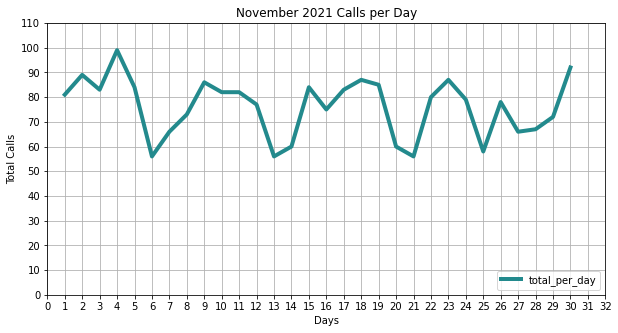

In [128]:
calls_2021_nov_days.plot.line(xlabel = 'Days',
                              ylabel = 'Total Calls',
                              title = 'November 2021 Calls per Day',
                              figsize = (10,5),
                              grid = True,
                              xlim = (0,32),
                              ylim = (0, 110),
                              xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32],
                              yticks = [0,10,20,30,40,50,60,70,80,90,100,110],
                              linewidth = 4,
                              colormap ='viridis',
                              color = ['#238A8DFF'])

plt.legend(loc = 'lower right');

C:\Users\kahar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:244: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
C:\Users\kahar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


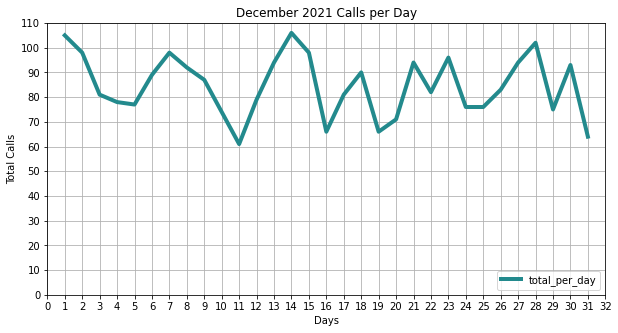

In [130]:
calls_2021_dec_days.plot.line(xlabel = 'Days',
                              ylabel = 'Total Calls',
                              title = 'December 2021 Calls per Day',
                              figsize = (10,5),
                              grid = True,
                              xlim = (0,32),
                              ylim = (0, 110),
                              xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32],
                              yticks = [0,10,20,30,40,50,60,70,80,90,100,110],
                              linewidth = 4,
                              colormap ='viridis',
                              color = ['#238A8DFF'])

plt.legend(loc = 'lower right')